In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import datetime
import calendar
from datetime import timedelta


# How many

## Data

- [Dati Istat](https://www.istat.it/it/archivio/240401?fbclid=IwAR0ya3WTO5_LUDLqgPsRkbhINYbO6hsdVwHwbu76mSG4EMpp1Bv98Vro1Pc)
- [Dati Protezione Civile](https://github.com/pcm-dpc/COVID-19)

https://twitter.com/d_spiegel/status/1249986522692096003

https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/bulletins/deathsregisteredweeklyinenglandandwalesprovisional/weekending3april2020

https://www.infodata.ilsole24ore.com/2020/03/27/43630/

https://www.wired.it/scienza/medicina/2020/03/26/sottostima-decessi-coronavirus/

In [51]:
morti_2020 = pd.read_excel("/Users/mrp/Desktop/CovidDemo/comuni-settimana/comuni_settimana.xlsx")
morti_2020['MESE'] = morti_2020.SETTIMANA.apply(lambda x: calendar.month_name[int(x.split('-')[0].split('/')[1])])
morti_2020['5YRS_AVG'] = morti_2020[['TOTALE_2015', 'TOTALE_2016', 'TOTALE_2017', 'TOTALE_2018', 'TOTALE_2019']].mean(axis=1)
morti_2020['5YRS_STD'] = morti_2020[['TOTALE_2015', 'TOTALE_2016', 'TOTALE_2017', 'TOTALE_2018', 'TOTALE_2019']].std(axis=1)
morti_2020.head()

,REG,PROV,COD_PROVCOM,NOME_REGIONE,NOME_PROVINCIA,NOME_COMUNE,SETTIMANA,CLASSE_DI_ETA,MASCHI_2015,MASCHI_2016,...,FEMMINE_2020,TOTALE_2015,TOTALE_2016,TOTALE_2017,TOTALE_2018,TOTALE_2019,TOTALE_2020,MESE,5YRS_AVG,5YRS_STD
0,1,1,1001,Piemonte,Torino,Agliè,01/01-11/01,0-14 anni,0,0,...,0,0,0,0,0,0,0,January,0.0,0.0
1,1,1,1001,Piemonte,Torino,Agliè,12/01-18/01,0-14 anni,0,0,...,0,0,0,0,0,0,0,January,0.0,0.0
2,1,1,1001,Piemonte,Torino,Agliè,19/01-25/01,0-14 anni,0,0,...,0,0,0,0,0,0,0,January,0.0,0.0
3,1,1,1001,Piemonte,Torino,Agliè,26/01-01/02,0-14 anni,0,0,...,0,0,0,0,0,0,0,January,0.0,0.0
4,1,1,1001,Piemonte,Torino,Agliè,02/02-08/02,0-14 anni,0,0,...,0,0,0,0,0,0,0,February,0.0,0.0


In [53]:
morti_2020[['5YRS_AVG', '5YRS_STD', 'TOTALE_2015', 'TOTALE_2016', 'TOTALE_2017', 'TOTALE_2018', 'TOTALE_2019', 'TOTALE_2020']].tail()

,5YRS_AVG,5YRS_STD,TOTALE_2015,TOTALE_2016,TOTALE_2017,TOTALE_2018,TOTALE_2019,TOTALE_2020
69595,1.0,0.707107,1,2,1,0,1,1
69596,1.6,0.894427,2,2,2,0,2,2
69597,1.2,1.303840,3,0,1,0,2,2
69598,0.4,0.547723,1,1,0,0,0,1
69599,1.2,1.095445,1,1,1,3,0,1


In [3]:
COLUMNS = ['SETTIMANA', 'MESE', '5YRS_AVG',
           'NOME_REGIONE', 'NOME_PROVINCIA', 'NOME_COMUNE',
           'TOTALE_2015', 'TOTALE_2016', 'TOTALE_2017',
           'TOTALE_2018', 'TOTALE_2019', 'TOTALE_2020']

In [5]:
morti_2020['MESE'] = morti_2020.SETTIMANA.apply(lambda x: calendar.month_name[int(x.split('-')[0].split('/')[1])])

In [6]:
morti_2020[COLUMNS].head()

,SETTIMANA,MESE,5YRS_AVG,NOME_REGIONE,NOME_PROVINCIA,NOME_COMUNE,TOTALE_2015,TOTALE_2016,TOTALE_2017,TOTALE_2018,TOTALE_2019,TOTALE_2020
0,01/01-11/01,January,0.0,Piemonte,Torino,Agliè,0,0,0,0,0,0
1,12/01-18/01,January,0.0,Piemonte,Torino,Agliè,0,0,0,0,0,0
2,19/01-25/01,January,0.0,Piemonte,Torino,Agliè,0,0,0,0,0,0
3,26/01-01/02,January,0.0,Piemonte,Torino,Agliè,0,0,0,0,0,0
4,02/02-08/02,February,0.0,Piemonte,Torino,Agliè,0,0,0,0,0,0


In [57]:
ds_dict = {'01/01-11/01': "2020-01-12",
           '12/01-18/01': "2020-01-19",
           '19/01-25/01': "2020-01-26",
           '26/01-01/02': "2020-02-03",
           '02/02-08/02': "2020-02-09",
           '09/02-15/02': "2020-02-16",
           '16/02-22/02': "2020-02-23",
           '23/02-29/02': "2020-03-01",
           '01/03-07/03': "2020-03-08",
           '08/03-14/03': "2020-03-15",
           '15/03-21/03': "2020-03-22",
           '22/03-28/03': "2020-03-29"}
morti_2020.index = pd.DatetimeIndex(morti_2020.SETTIMANA.apply(lambda x: ds_dict[x]))
morti_2020['ds_week_ending'] = pd.DatetimeIndex(morti_2020.SETTIMANA.apply(lambda x: ds_dict[x]))
morti_2020.index.name = None

In [9]:
TEMPLATE = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-{unit}/dpc-covid19-ita-{unit}-{date}.csv"

In [10]:
start_date = datetime.date(2020, 2, 24)
end_date = datetime.date.today()
day_count = (end_date-start_date).days-1

covid_province = pd.concat([pd.read_csv(TEMPLATE.format(unit='province', date=single_date.strftime("%Y%m%d")))
                             for single_date in (start_date + timedelta(n) for n in range(day_count))])
covid_province['ds_week_ending'] = pd.DatetimeIndex(covid_province.data).to_period('W').end_time.floor('d')
        

covid_regioni = pd.concat([pd.read_csv(TEMPLATE.format(unit='regioni', date=single_date.strftime("%Y%m%d")))
                             for single_date in (start_date + timedelta(n) for n in range(day_count))])

covid_regioni['ds_week_ending'] = pd.DatetimeIndex(covid_regioni.data).to_period('W').end_time.floor('d')


In [11]:
covid_regioni['ds_week_ending'] = pd.DatetimeIndex(covid_regioni.data).to_period('W').end_time.floor('d')


In [12]:
covid_regioni.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en,ds_week_ending
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,2020-03-01
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2020-03-01
2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,2020-03-01
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,2020-03-01
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN,2020-03-01


In [13]:
covid_province.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en,ds_week_ending
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN,2020-03-01
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN,2020-03-01
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN,2020-03-01
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN,2020-03-01
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN,2020-03-01


In [14]:
covid_regioni.ds_week_ending.min()

Timestamp('2020-03-01 00:00:00')

In [15]:
(morti_2020['TOTALE_2020'] - morti_2020['5YRS_AVG'])[
    morti_2020.NOME_REGIONE.isin(['Lombardia'])].groupby('SETTIMANA').sum()

SETTIMANA
2020-01-12    -330.2
2020-01-19    -193.6
2020-01-26    -103.8
2020-02-03    -173.2
2020-02-09     -67.6
2020-02-16    -127.4
2020-02-23     -40.6
2020-03-01     224.2
2020-03-08     552.2
2020-03-15    2162.0
2020-03-22    3580.8
2020-03-29    3056.4
dtype: float64

In [16]:
covid_regioni[(covid_regioni.denominazione_regione=="Lombardia") &
              (covid_regioni.ds_week_ending<=pd.to_datetime("2020-03-28"))
             ].groupby('ds_week_ending').deceduti.sum().diff()

ds_week_ending
2020-03-01        NaN
2020-03-08      718.0
2020-03-15     4416.0
2020-03-22    11051.0
Name: deceduti, dtype: float64

In [17]:
covid_regioni

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en,ds_week_ending
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,2020-03-01
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2020-03-01
2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,2020-03-01
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,2020-03-01
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN,2020-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,2020-04-16T17:00:00,ITA,9,Toscana,43.769231,11.255889,940,213,1153,5460,6613,196,277,745,585,7943,91651,NaN,NaN,2020-04-19
17,2020-04-16T17:00:00,ITA,4,P.A. Trento,46.068935,11.121231,296,43,339,1748,2087,-17,74,885,322,3294,20773,NaN,NaN,2020-04-19
18,2020-04-16T17:00:00,ITA,10,Umbria,43.106758,12.388247,116,33,149,387,536,-46,7,738,55,1329,21487,NaN,NaN,2020-04-19
19,2020-04-16T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,105,12,117,401,518,-30,13,331,122,971,4159,NaN,NaN,2020-04-19


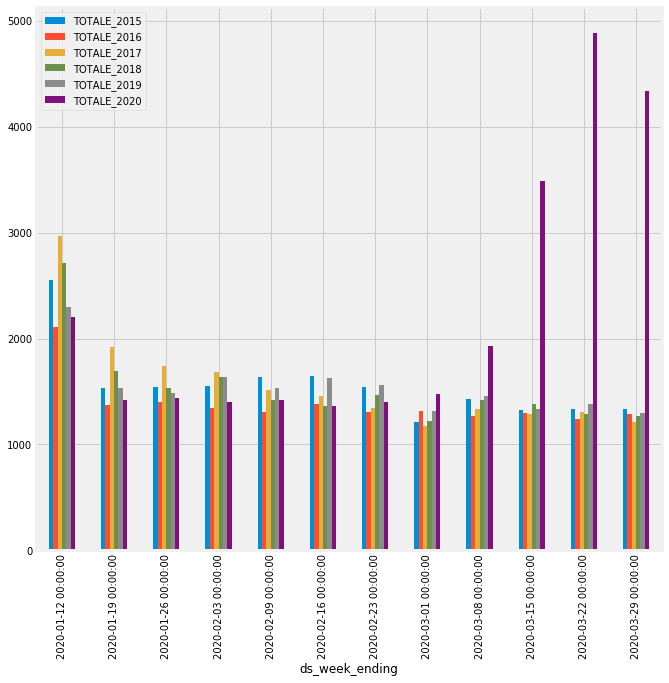

In [59]:
morti_2020[morti_2020.NOME_REGIONE=="Lombardia"].groupby("ds_week_ending")[
    ['TOTALE_2015', 'TOTALE_2016', 'TOTALE_2017', 'TOTALE_2018', 'TOTALE_2019', 'TOTALE_2020']].sum().sort_index().plot(kind='bar', figsize=(10,10))

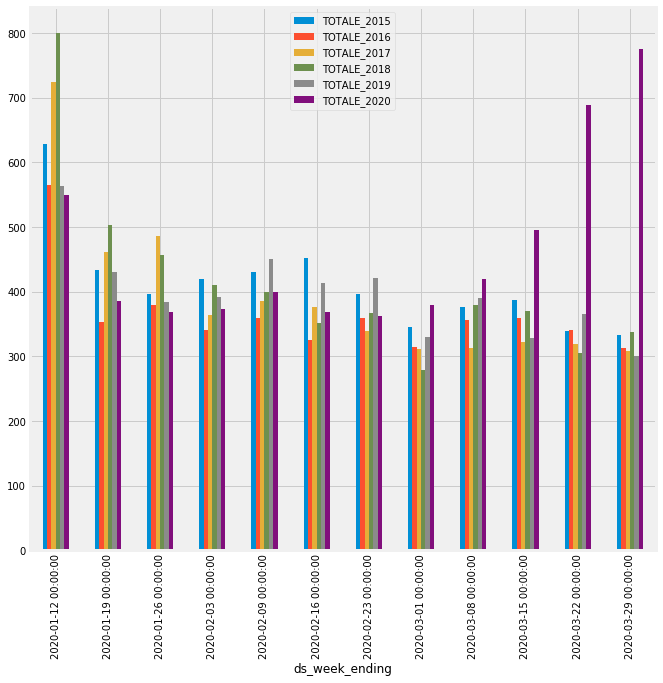

In [58]:
morti_2020[morti_2020.NOME_REGIONE=="Piemonte"].groupby("ds_week_ending")[
    ['TOTALE_2015', 'TOTALE_2016', 'TOTALE_2017', 'TOTALE_2018', 'TOTALE_2019', 'TOTALE_2020']].sum().sort_index().plot(kind='bar', figsize=(10,10))

### Small Comuni

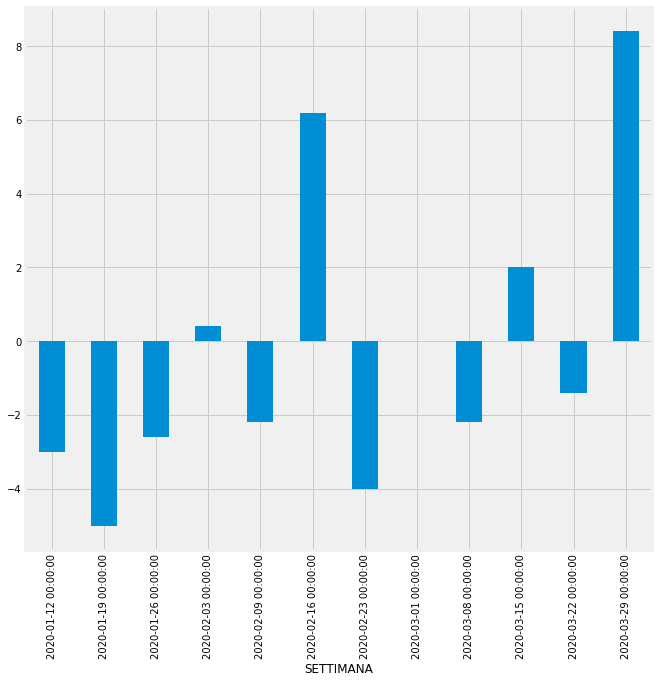

In [25]:
(morti_2020['TOTALE_2020'] - morti_2020['5YRS_AVG'])[morti_2020.NOME_COMUNE=='Grugliasco'].groupby('SETTIMANA').sum().plot(kind='bar', figsize=(10,10))


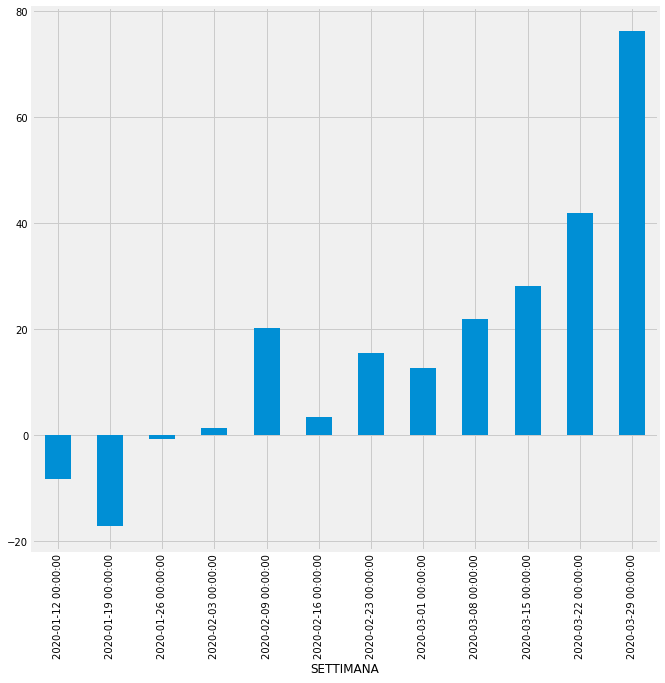

In [23]:
(morti_2020['TOTALE_2020'] - morti_2020['5YRS_AVG'])[morti_2020.NOME_PROVINCIA=='Torino'].groupby('SETTIMANA').sum().plot(kind='bar', figsize=(10,10))


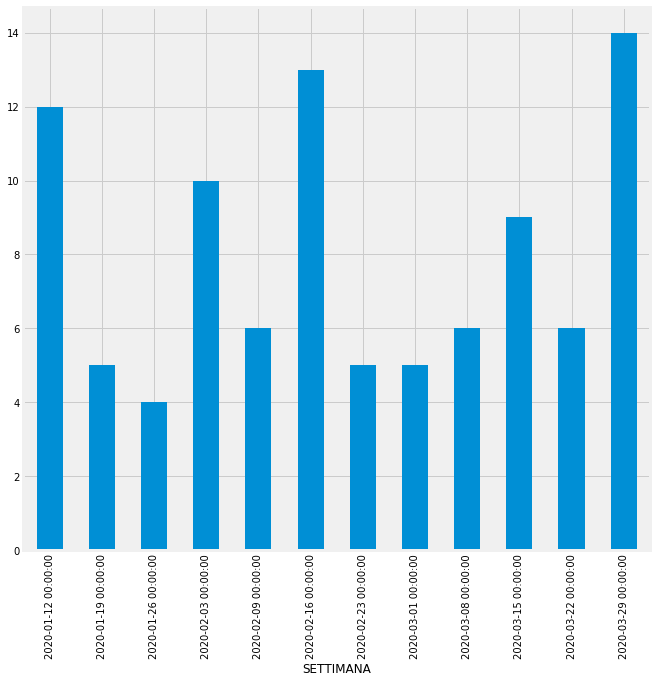

In [24]:
(morti_2020['TOTALE_2020'])[morti_2020.NOME_COMUNE=='Grugliasco'].groupby('SETTIMANA').sum().plot(kind='bar', figsize=(10,10))


## Analysis

In [19]:

def compare_deaths(regione):
    
    ax = (morti_2020['TOTALE_2020'] - morti_2020['5YRS_AVG'])[
        morti_2020.NOME_REGIONE.isin([regione]) &
        (morti_2020.index >= pd.to_datetime("2020-02-29"))
    ].groupby('SETTIMANA').sum().plot(kind='bar', alpha=0.5, figsize=(10,10), label="Morti Totali")
    
    morti_regione = covid_regioni[(covid_regioni.denominazione_regione==regione) &
              (covid_regioni.ds_week_ending<=pd.to_datetime("2020-03-28"))]
    morti_regione['morti_giorno'] = morti_regione.deceduti.diff()
    
    morti_regione.groupby('ds_week_ending').morti_giorno.sum().plot(kind='bar', alpha=0.5, color='red', ax=ax, label="Morti COVID-19")
    
    title = "Morti in {0} per COVID-19 vs. Morti in Eccesso rispetto alla media stagionale".format(regione)
    
    ax.set_title(title)
    ax.legend()
    ax.axvline(x=1, color="red", label="KS")





In [33]:
covid_regioni.denominazione_regione.unique()

array(['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
       'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [35]:
morti_2020.NOME_REGIONE.unique()

array(['Piemonte', "Valle d'Aosta/Vallée d'Aoste", 'Liguria', 'Lombardia',
       'Trentino-Alto Adige/Südtirol', 'Veneto', 'Friuli-Venezia Giulia',
       'Emilia-Romagna', 'Marche', 'Toscana', 'Umbria', 'Lazio',
       'Campania', 'Abruzzo', 'Molise', 'Puglia', 'Basilicata',
       'Calabria', 'Sicilia', 'Sardegna'], dtype=object)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


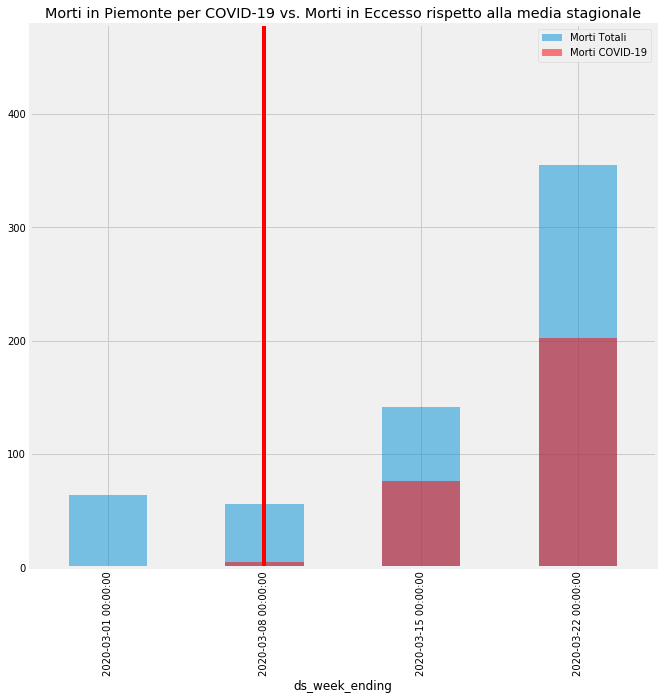

In [21]:
compare_deaths('Piemonte')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


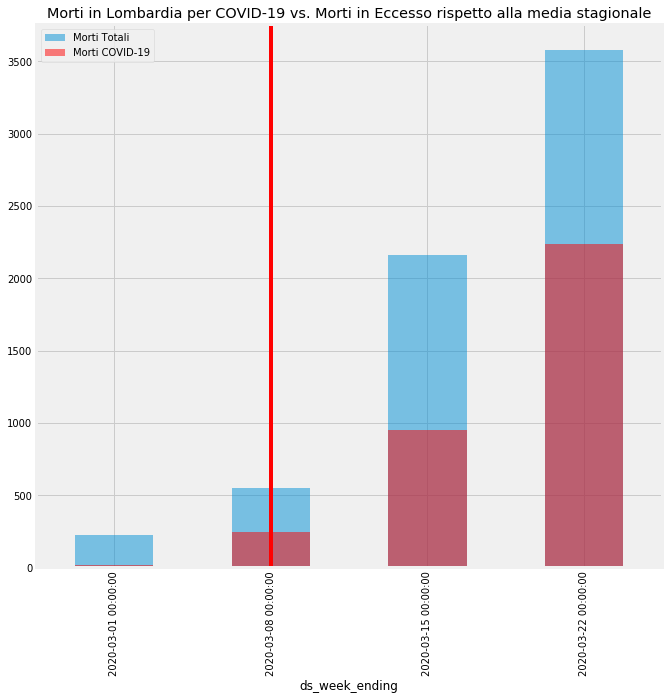

In [22]:
compare_deaths('Lombardia')

In [ ]:
# plot 5 year average with confidence bars

In [64]:
len(morti_2020[morti_2020.NOME_PROVINCIA=='Torino'].NOME_COMUNE.unique())

41

In [62]:
morti_2020[morti_2020.NOME_PROVINCIA=='Torino'].groupby('NOME_COMUNE').SETTIMANA.count()

NOME_COMUNE
Agliè                      48
Almese                     48
Avigliana                  48
Banchette                  48
Beinasco                   48
Bosconero                  48
Bruino                     48
Buttigliera Alta           48
Carmagnola                 48
Castellamonte              48
Condove                    48
Frossasco                  48
Gassino Torinese           48
Grugliasco                 48
Ivrea                      48
Lanzo Torinese             48
Luserna San Giovanni       48
Mathi                      48
None                       48
Orbassano                  48
Pancalieri                 48
Piossasco                  48
Piscina                    48
Poirino                    48
Riva presso Chieri         48
Rivara                     48
Rivarolo Canavese          48
San Giorgio Canavese       48
San Giusto Canavese        48
San Mauro Torinese         48
San Raffaele Cimena        48
San Secondo di Pinerolo    48
Sangano                    4

In [63]:
morti_2020[morti_2020.NOME_PROVINCIA=='Torino'].shape

(1968, 30)

In [28]:
morti_2020[morti_2020.NOME_REGIONE=='Piemonte'].NOME_PROVINCIA.unique()

array(['Torino', 'Vercelli', 'Novara', 'Cuneo', 'Asti', 'Alessandria',
       'Biella', 'Verbano-Cusio-Ossola'], dtype=object)

In [29]:
morti_2020[morti_2020.NOME_REGIONE=='Piemonte'].NOME_COMUNE.unique()

array(['Agliè', 'Almese', 'Avigliana', 'Banchette', 'Beinasco',
       'Bosconero', 'Bruino', 'Buttigliera Alta', 'Carmagnola',
       'Castellamonte', 'Condove', 'Frossasco', 'Gassino Torinese',
       'Grugliasco', 'Ivrea', 'Lanzo Torinese', 'Luserna San Giovanni',
       'Mathi', 'None', 'Orbassano', 'Pancalieri', 'Piossasco', 'Piscina',
       'Poirino', 'Riva presso Chieri', 'Rivara', 'Rivarolo Canavese',
       'Sangano', 'San Giorgio Canavese', 'San Giusto Canavese',
       'San Mauro Torinese', 'San Raffaele Cimena',
       'San Secondo di Pinerolo', 'Strambino', 'Susa', 'Trofarello',
       'Valperga', 'Verolengo', 'Villar Perosa', 'Villastellone',
       'Volpiano', 'Borgosesia', 'Buronzo', 'Caresanablot', 'Gattinara',
       'Roasio', 'Saluggia', 'Santhià', 'Trino', 'Varallo',
       'Bellinzago Novarese', 'Borgo Ticino', 'Cameri', 'Cerano',
       'Cressa', 'Fara Novarese', "Fontaneto d'Agogna", 'Ghemme',
       'Gozzano', 'Grignasco', 'Maggiora', 'Novara', 'Oleggio', 'Pogn

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


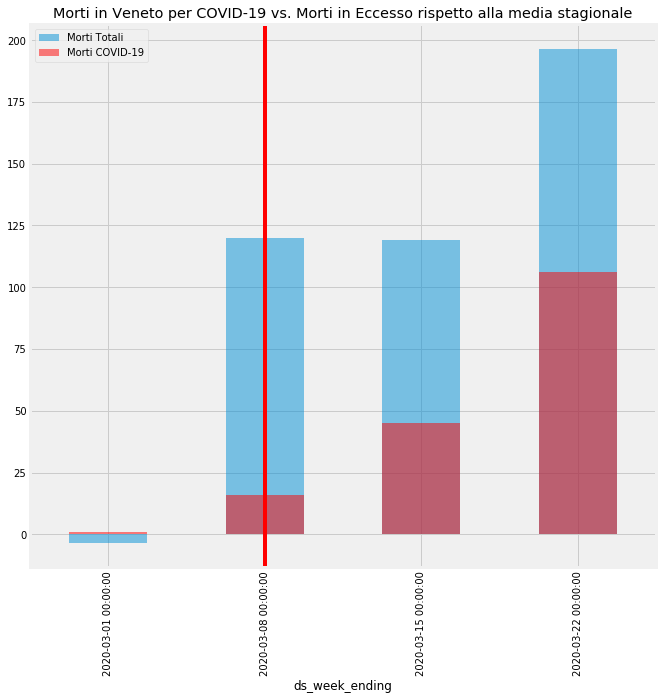

In [37]:
compare_deaths('Veneto')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


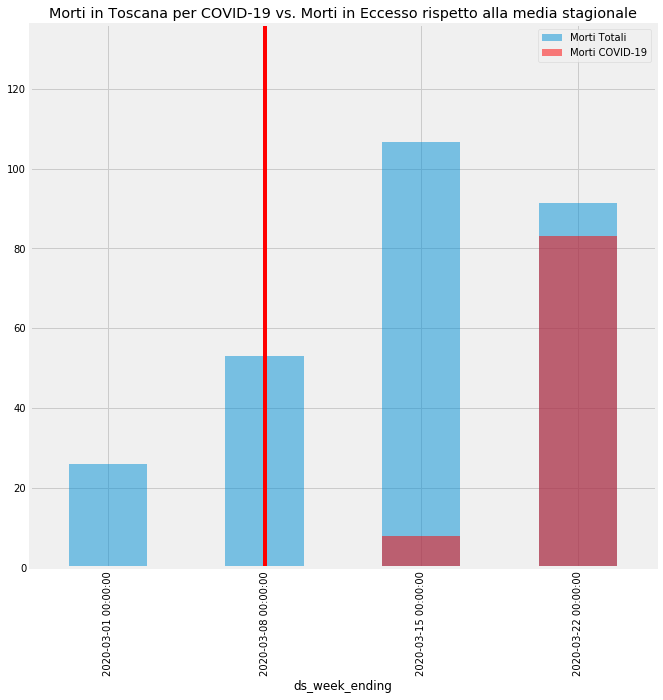

In [31]:
compare_deaths('Toscana')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


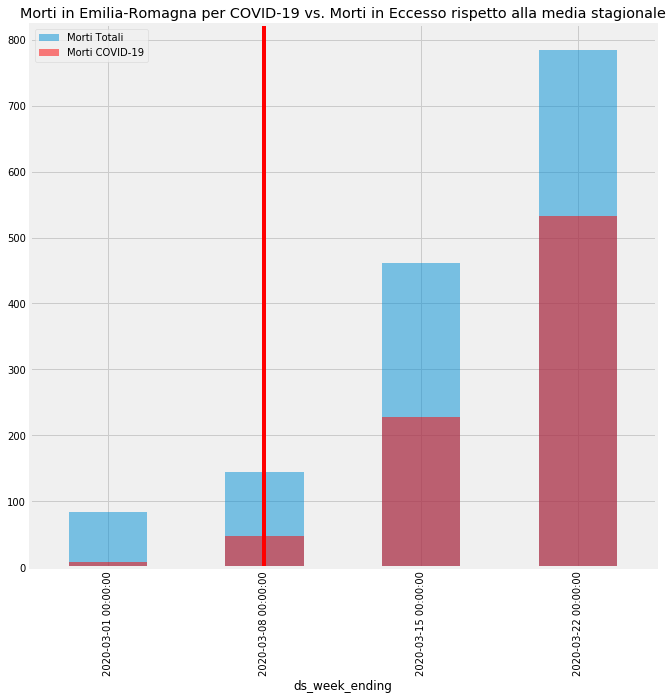

In [36]:
compare_deaths('Emilia-Romagna')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


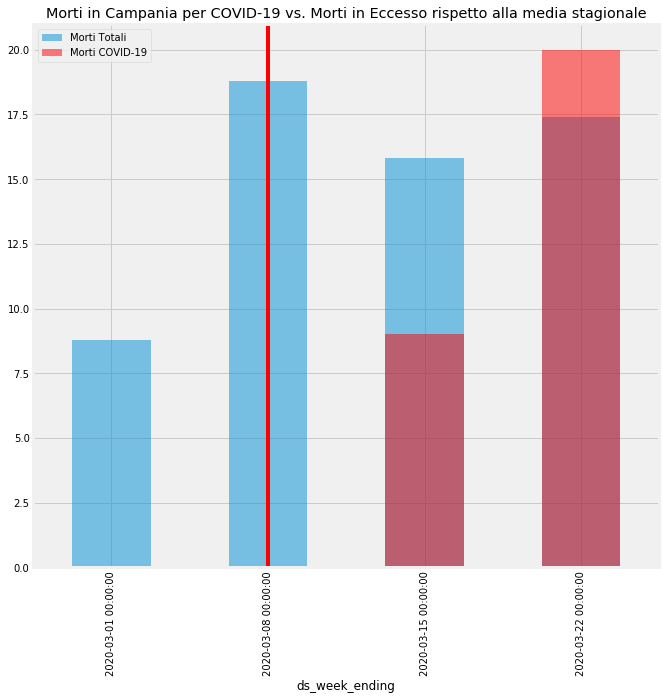

In [20]:
compare_deaths('Campania')

In [30]:
morti_2020[morti_2020.NOME_REGIONE=='Lombardia'].NOME_COMUNE.unique()

array(['Albizzate', 'Barasso', 'Besano', 'Cairate', 'Carnago',
       'Caronno Pertusella', 'Caronno Varesino', 'Casciago',
       'Casorate Sempione', 'Cassano Magnago', 'Cocquio-Trevisago',
       'Germignaga', 'Gorla Maggiore', 'Gorla Minore', 'Ispra',
       'Lonate Ceppino', 'Lonate Pozzolo', 'Morazzone', 'Olgiate Olona',
       'Porto Ceresio', 'Saltrio', 'Taino', 'Varese',
       'Venegono Superiore', 'Maccagno con Pino e Veddasca',
       'Appiano Gentile', 'Arosio', 'Asso', 'Beregazzo con Figliaro',
       'Binago', 'Bulgarograsso', 'Cabiate', 'Cantù', 'Cermenate', 'Como',
       'Dongo', 'Erba', 'Figino Serenza', 'Grandate', 'Inverigo',
       'Lipomo', 'Lomazzo', 'Luisago', "Lurago d'Erba", 'Lurate Caccivio',
       'Mariano Comense', 'Maslianico', 'Menaggio', 'Olgiate Comasco',
       'Ponte Lambro', 'Porlezza', 'Sala Comacina',
       'Vertemate con Minoprio', 'Bellagio', 'Colverde',
       'Centro Valle Intelvi', 'Aprica', 'Ardenno', 'Bormio', 'Chiuro',
       'Cosio Valt

In [6]:
morti_storico = pd.read_excel("/Users/mrp/Desktop/CovidDemo/mortalità-per-giorno-periodo-01_01-30_04-anni-2015-2019-totali/totali_comunali.xlsx")
morti_storico.head()

,COMUNE,NOME_COMUNE,PROVINCIA,NOME_PROVINCIA,REGIONE,NOME_REGIONE,MESE_DECESSO,GIORNO_DECESSO,DECESSI_2015,DECESSI_2016,DECESSI_2017,DECESSI_2018,DECESSI_2019
0,1001,Agliè,1,Torino,1,Piemonte,1,1,0,0,0,0,0
1,1001,Agliè,1,Torino,1,Piemonte,1,2,0,0,0,1,0
2,1001,Agliè,1,Torino,1,Piemonte,1,3,0,0,0,0,0
3,1001,Agliè,1,Torino,1,Piemonte,1,4,0,1,0,0,0
4,1001,Agliè,1,Torino,1,Piemonte,1,5,0,0,0,0,0


In [8]:
morti_storico.columns

Index(['COMUNE', 'NOME_COMUNE', 'PROVINCIA', 'NOME_PROVINCIA', 'REGIONE',
       'NOME_REGIONE', 'MESE_DECESSO', 'GIORNO_DECESSO', 'DECESSI_2015',
       'DECESSI_2016', 'DECESSI_2017', 'DECESSI_2018', 'DECESSI_2019'],
      dtype='object')

In [57]:
morti_storico.MESE_DECESSO.max()

4